# 关联 （Correlation）

## 散点图（Scatter plot）

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385


<Figure size 800x400 with 0 Axes>

[(0, 90000), Text(0, 0.5, 'Population'), (0.0, 0.1), Text(0.5, 0, 'Area')]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Scatterplot of Midwest Area vs Population')

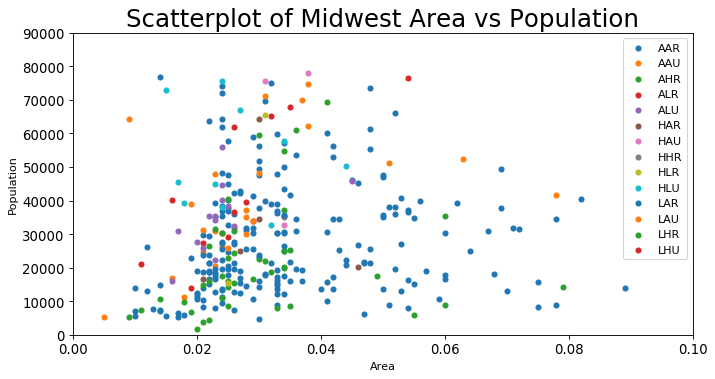

In [1]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest[:3]
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, cmap=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=10) 

## 带边界的气泡图（Bubble plot with Encircling）

[(0, 90000), Text(0, 0.5, 'Population'), (0.0, 0.1), Text(0.5, 0, 'Area')]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Bubble Plot with Encircling')

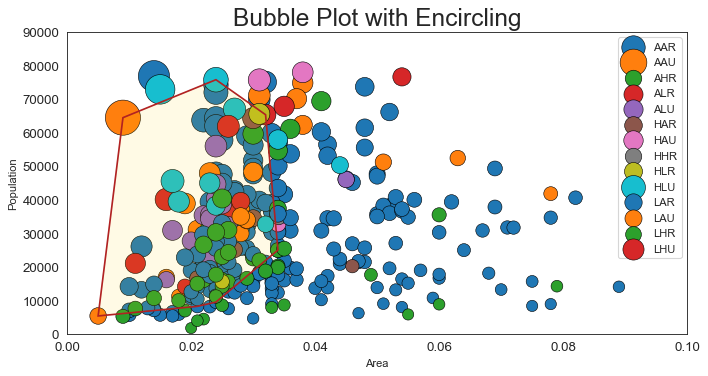

In [2]:
from scipy.spatial import ConvexHull
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], 
                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p) #计算凸点
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=10)    

## 带线性回归最佳拟合线的散点图 （Scatter plot with linear regression line of best fit）

Text(0.5, 1, 'Scatterplot with line of best fit grouped by number of cylinders')

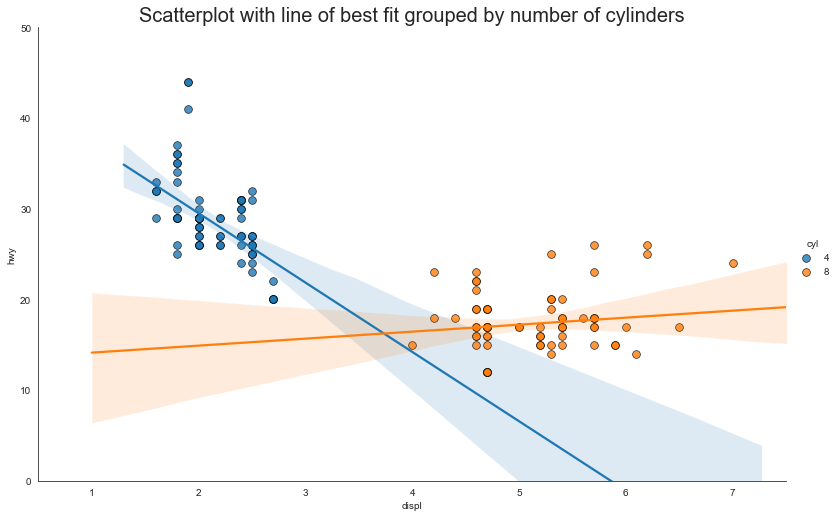

In [3]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

## 抖动图 （Jittering with stripplot）
通常，多个数据点具有完全相同的 X 和 Y 值。 结果，多个点绘制会重叠并隐藏。 为避免这种情况，请将数据点稍微抖动，以便您可以直观地看到它们。 使用 seaborn 的 `stripplot（）` 很方便实现这个功能。

Text(0.5, 1.0, 'Use jittered plots to avoid overlapping of points')

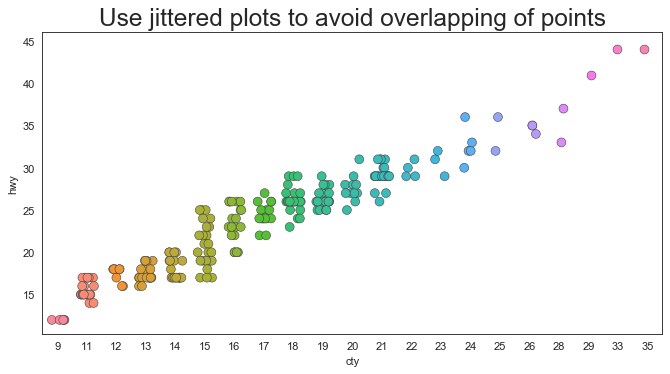

In [4]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(10,5), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)

## 计数图 （Counts Plot）

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10


Text(0.5, 1.0, 'Counts Plot - Size of circle is bigger as more points overlap')

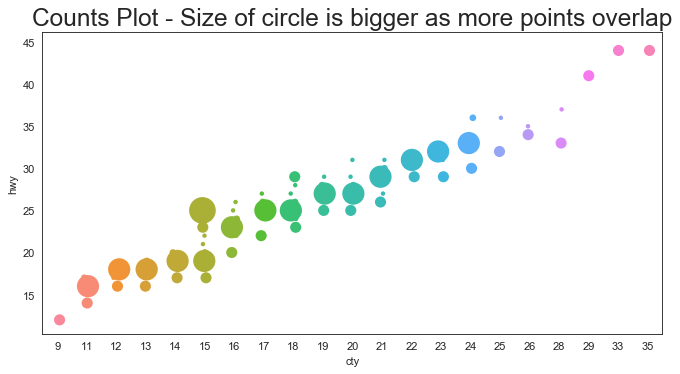

In [5]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts[:3]
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 5), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)

## 边缘直方图 （Marginal Histogram）

(array([ 5., 14., 24.,  0.,  6., 13., 20.,  0., 18.,  0.,  8.,  6.,  9.,
         4.,  7.,  3.,  8., 18.,  0.,  4.,  1.,  0., 28.,  0.,  0.,  2.,
         5.,  6.,  8.,  1.,  8.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,
         1.]),
 array([1.6  , 1.735, 1.87 , 2.005, 2.14 , 2.275, 2.41 , 2.545, 2.68 ,
        2.815, 2.95 , 3.085, 3.22 , 3.355, 3.49 , 3.625, 3.76 , 3.895,
        4.03 , 4.165, 4.3  , 4.435, 4.57 , 4.705, 4.84 , 4.975, 5.11 ,
        5.245, 5.38 , 5.515, 5.65 , 5.785, 5.92 , 6.055, 6.19 , 6.325,
        6.46 , 6.595, 6.73 , 6.865, 7.   ]),
 <a list of 1 Patch objects>)

(array([ 5.,  0.,  2., 10.,  0.,  7., 31., 10., 13.,  0., 11.,  2.,  7.,
         7.,  0., 13., 15., 32., 14.,  0.,  7., 22.,  4.,  7.,  0.,  4.,
         2.,  1.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         2.]),
 array([12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8, 17.6, 18.4, 19.2, 20. ,
        20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6, 26.4, 27.2, 28. , 28.8,
        29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4, 35.2, 36. , 36.8, 37.6,
        38.4, 39.2, 40. , 40.8, 41.6, 42.4, 43.2, 44. ]),
 <a list of 1 Patch objects>)

[Text(0, 0.5, 'hwy'),
 Text(0.5, 0, 'displ'),
 Text(0.5, 1.0, 'Scatterplot with Histograms \n displ vs hwy')]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0')]

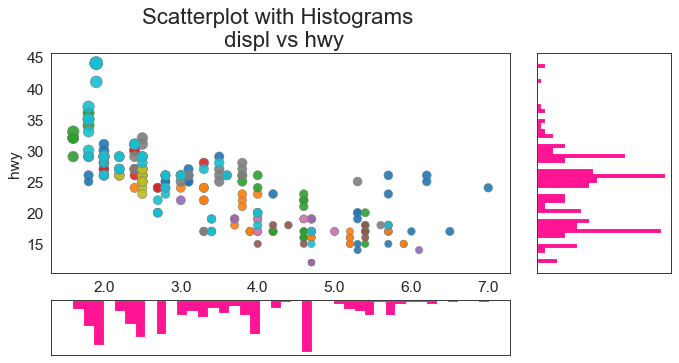

In [6]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 5), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)

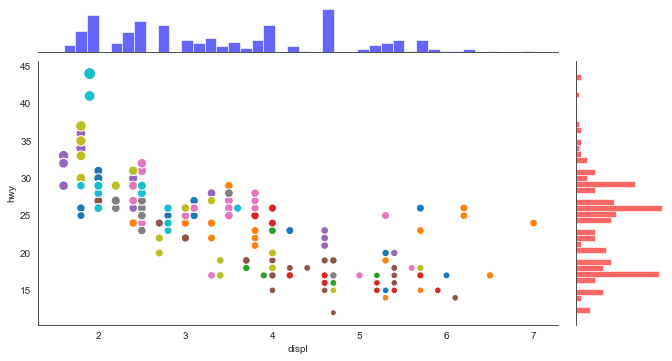

In [7]:
g = sns.JointGrid(x="displ", y="hwy", data=df)
g = g.plot_joint(plt.scatter, cmap=plt.cm.tab10, edgecolor="white", s=df.cty*4, c=np.linspace(0, 1, 234))
_ = g.ax_marg_x.hist(df["displ"], color="b", alpha=.6, bins=40)
_ = g.ax_marg_y.hist(df["hwy"], color="r", alpha=.6, orientation="horizontal", bins=40)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

## 边缘箱形图 （Marginal Boxplot)

[Text(0.5, 0, '')]

[Text(0, 0.5, '')]

[Text(0, 0.5, 'hwy'),
 Text(0.5, 0, 'displ'),
 Text(0.5, 1.0, 'Scatterplot with Histograms \n displ vs hwy')]

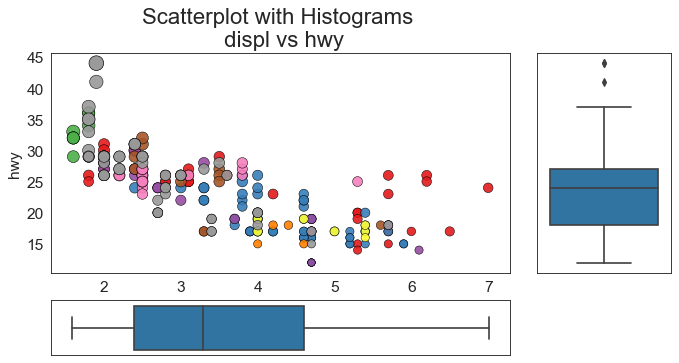

In [8]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 5), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

{'whiskers': [<matplotlib.lines.Line2D at 0x198c7e1b7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x198c7e13708>,
 'boxes': [<matplotlib.lines.Line2D at 0x198c7dfa1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x198c7e13908>],
 'fliers': [<matplotlib.lines.Line2D at 0x198c7e27588>],
 'means': [<matplotlib.lines.Line2D at 0x198c7e27d88>]}

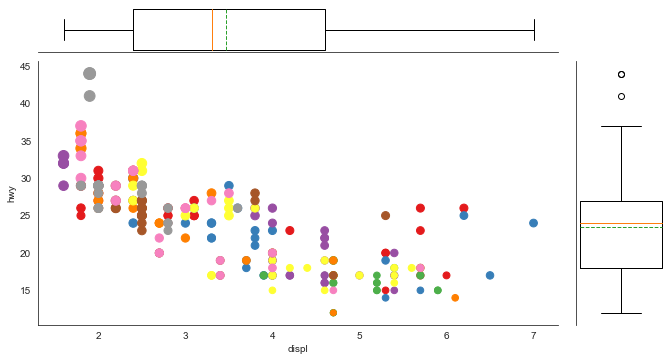

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
g = sns.JointGrid(x='displ', y='hwy', data=df)
g = g.plot_joint(plt.scatter, c=np.linspace(0, 1, 234), cmap=plt.cm.Set1, s=df.cty*4)
ax1 = g.ax_marg_x.boxplot(df['displ'], vert=False, showmeans=True, meanline=True, widths=2)
# ax1['means'][0].set_color('red')
g.ax_marg_y.boxplot(df['hwy'], vert=True, showmeans=True, meanline=True, widths=2)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

## 相关图 （Correllogram)

<Figure size 800x400 with 0 Axes>

Text(0.5, 1, 'Correlogram of mtcars')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text yticklabel objects>)

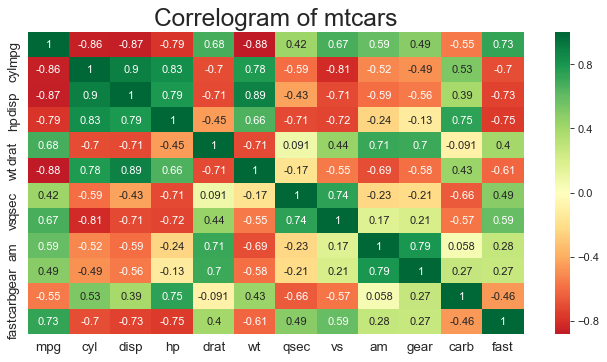

In [10]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(10, 5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 矩阵图 （Pairwise Plot）

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

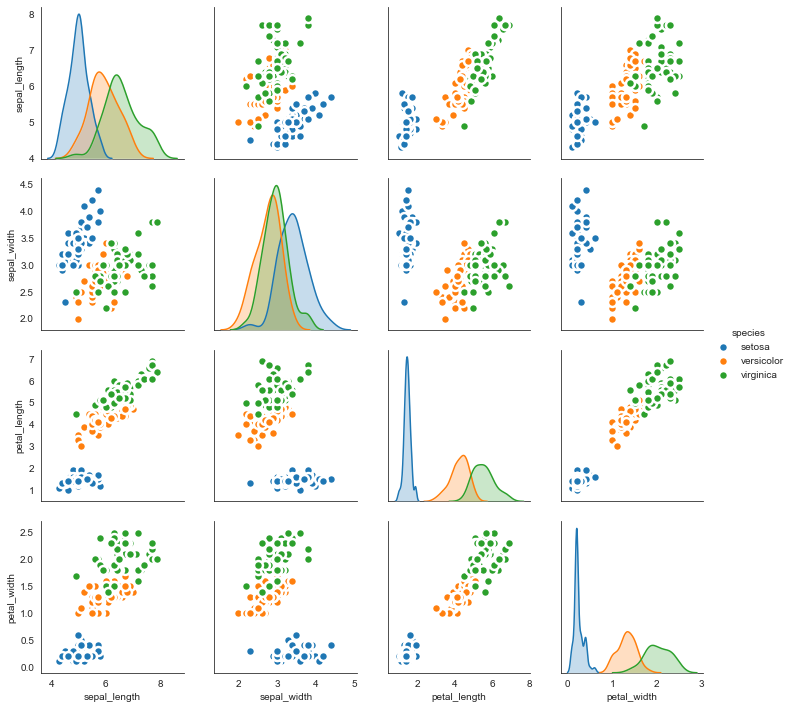

In [14]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

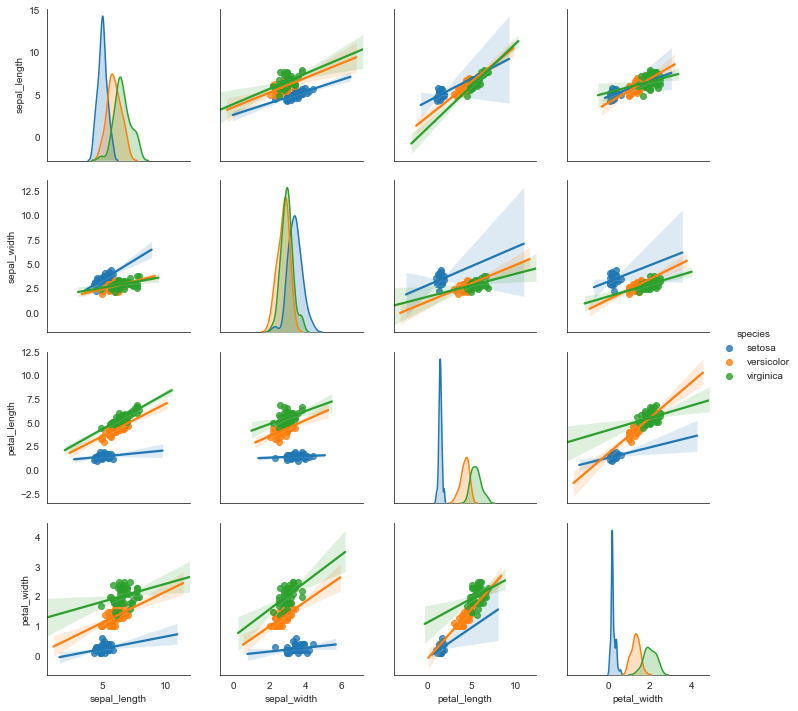

In [15]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")

#  偏差 （Deviation）

## 发散型条形图 （Diverging Bars

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


<Figure size 1120x800 with 0 Axes>

[Text(0, 0.5, '$Model$'), Text(0.5, 0, '$Mileage$')]

([<matplotlib.axis.YTick at 0x19647777c08>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Bars of Car Mileage')

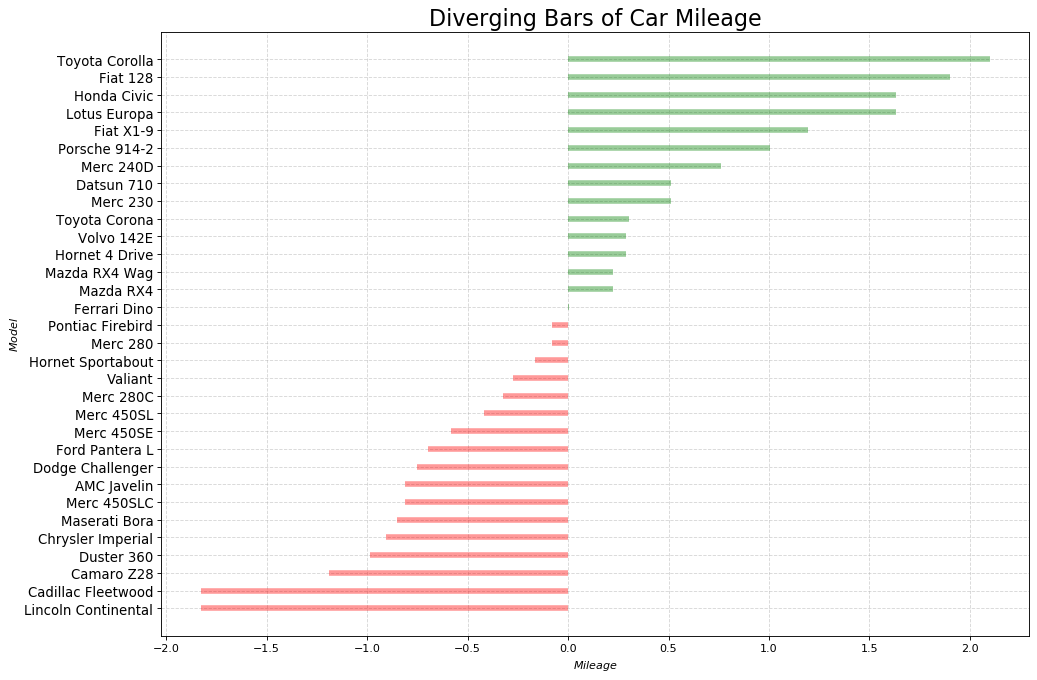

In [4]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df[:5]

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

## 发散型文本 （Diverging Texts）

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


<Figure size 1120x1120 with 0 Axes>

([<matplotlib.axis.YTick at 0x19649ebd188>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Text Bars of Car Mileage')

(-2.5, 2.5)

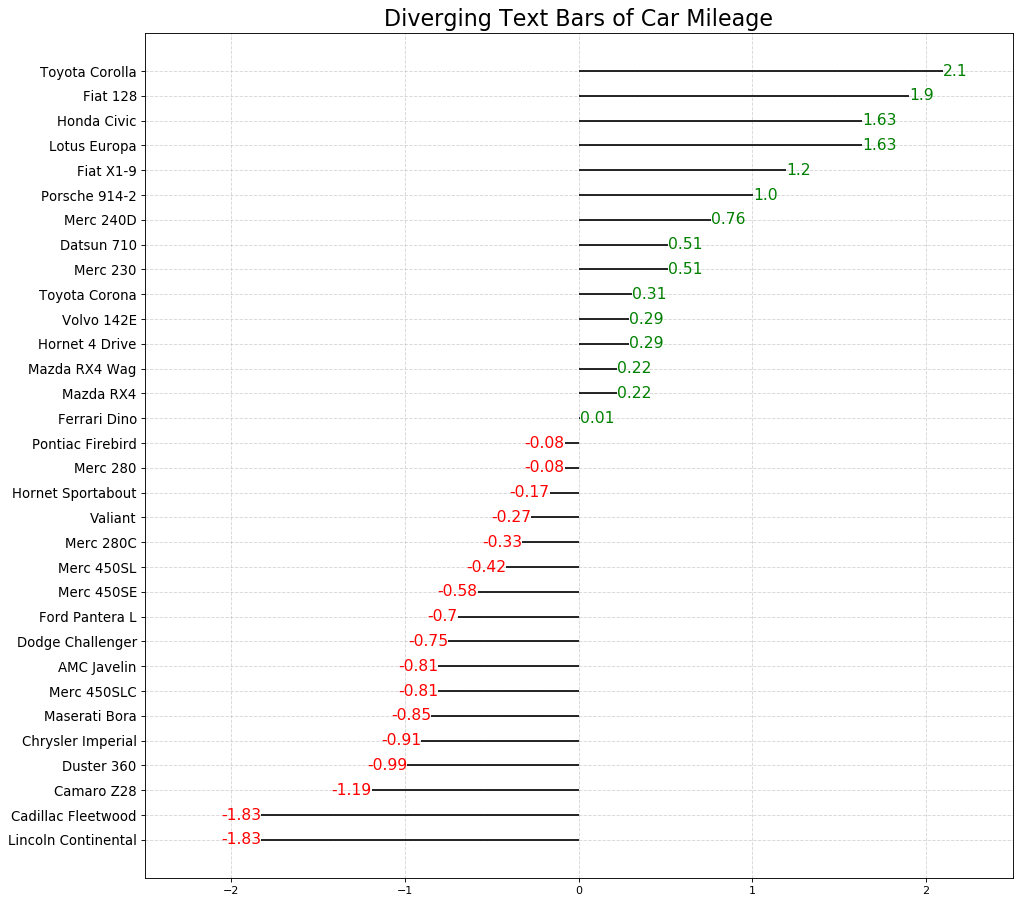

In [6]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df[:5]

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 发散型包点图 （Diverging Dot Plot）

<Figure size 1120x1280 with 0 Axes>

([<matplotlib.axis.YTick at 0x19649a9a8c8>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Dotplot of Car Mileage')

Text(0.5, 0, '$Mileage$')

(-2.5, 2.5)

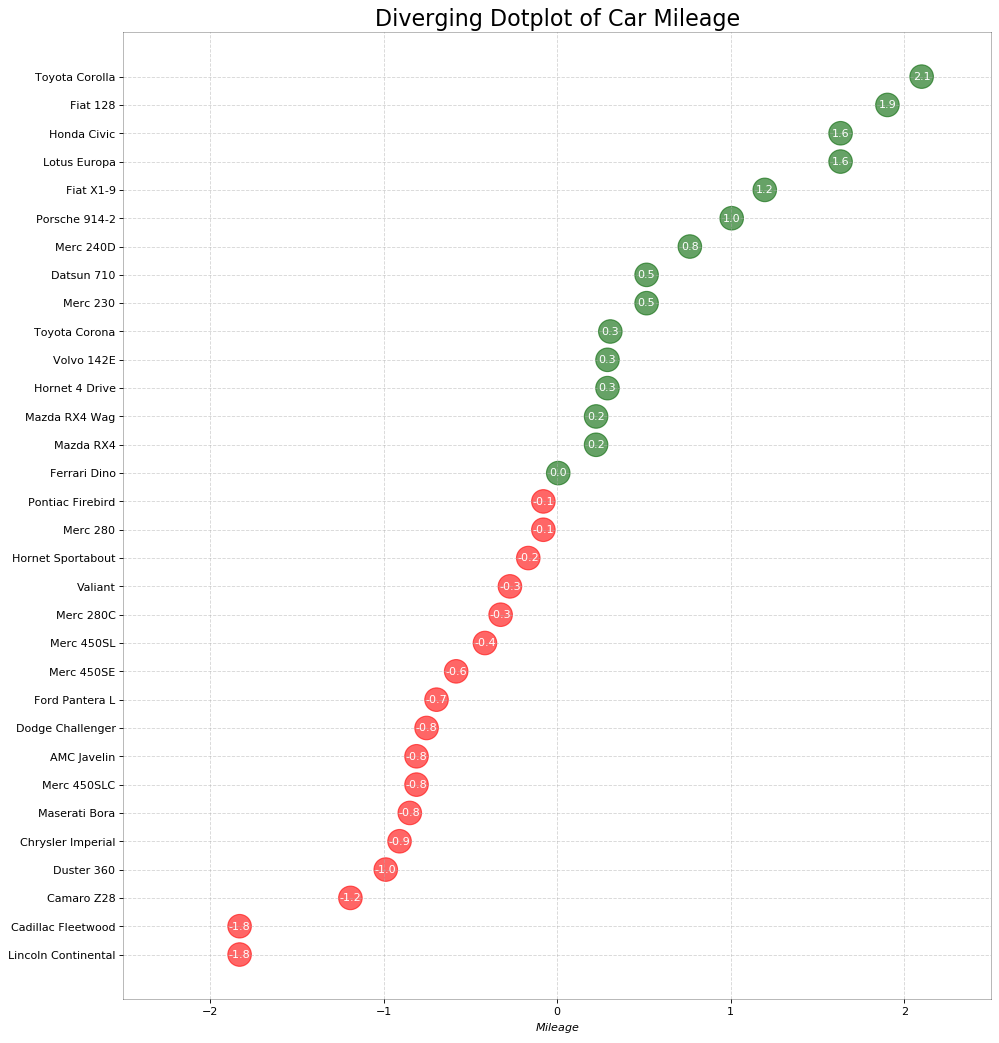

In [7]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 带标记的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）

<Figure size 1120x1280 with 0 Axes>

([<matplotlib.axis.YTick at 0x19647c05908>,
 <a list of 32 Text yticklabel objects>)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 11 Text xticklabel objects>)

Text(1.0, 11, 'Mercedes Models')

Text(0.5, 1.0, 'Diverging Bars of Car Mileage')

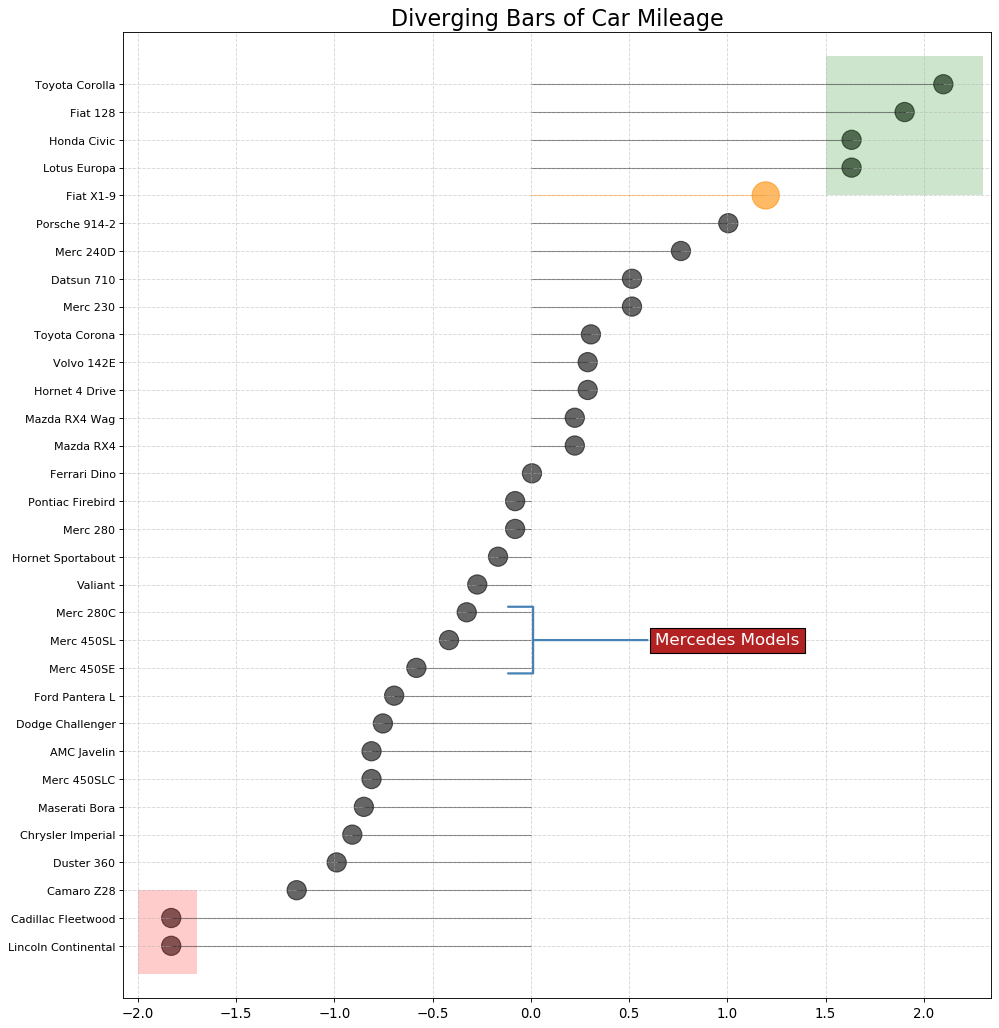

In [12]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), 
             color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 面积图 （Area Chart）

<Figure size 1280x800 with 0 Axes>

Text(88.0, 28, 'Peak \n1975')

[Text(0, 0, 'JUL-1967'),
 Text(0, 0, 'JAN-1968'),
 Text(0, 0, 'JUL-1968'),
 Text(0, 0, 'JAN-1969'),
 Text(0, 0, 'JUL-1969'),
 Text(0, 0, 'JAN-1970'),
 Text(0, 0, 'JUL-1970'),
 Text(0, 0, 'JAN-1971'),
 Text(0, 0, 'JUL-1971'),
 Text(0, 0, 'JAN-1972'),
 Text(0, 0, 'JUL-1972'),
 Text(0, 0, 'JAN-1973'),
 Text(0, 0, 'JUL-1973'),
 Text(0, 0, 'JAN-1974'),
 Text(0, 0, 'JUL-1974'),
 Text(0, 0, 'JAN-1975'),
 Text(0, 0, 'JUL-1975')]

(-35, 35)

(1, 100)

Text(0.5, 1.0, 'Month Economics Return %')

Text(0, 0.5, 'Monthly returns %')

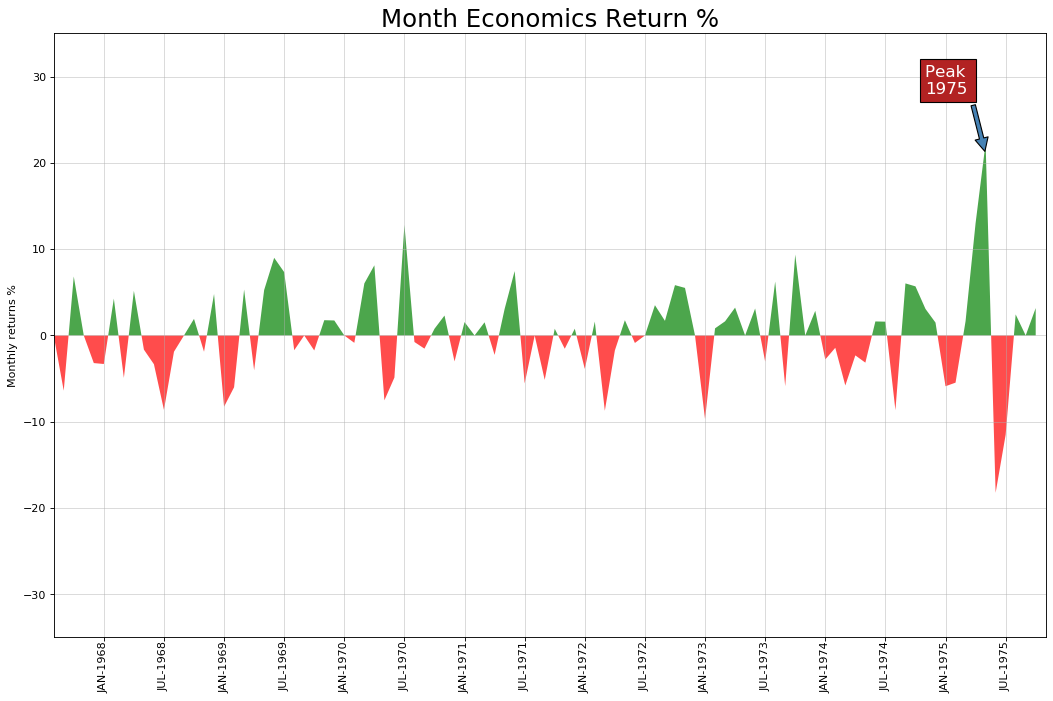

In [14]:
import numpy as np
import pandas as pd

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()